# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [3]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [4]:
# load imdb dataset as pandas dataframe
df1 = pd.read_csv("../imdb_1000.csv")

In [5]:
# show first 5 rows of imdb_df
df1.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [6]:
# load bikes dataset as pandas dataframe
d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
df2 = pd.read_csv("../bikes.csv",sep = ';', parse_dates = ['Date'], date_parser = d_parser)



<ipython-input-6-bc1b520bc975>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')


In [7]:
# show first 3 rows of bikes_df
df2.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [8]:
# list columns of imdb_df
df1.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [9]:
# what are the datatypes of values in columns
df1.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [10]:
# list first 5 movie titles
df1.loc[0:5,["title"]]

,title
0,The Shawshank Redemption
1,The Godfather
2,The Godfather: Part II
3,The Dark Knight
4,Pulp Fiction
5,12 Angry Men


In [11]:
# show only movie title and genre
df1[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [12]:
# show the type of duration column
df1[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


In [13]:
# show duration values of movies as numpy arrays
import numpy as np
s1 = np.array(df1['duration'])

print(s1)
print(type(s1))

[142 175 200 152 154  96 161 201 195 139 178 148 124 142 179 169 133 207
 146 121 136 130 130 106 127 116 175 118 110  87 125 112 102 107 119  87
 169 115 112 109 189 110 150 165 155 137 113 165  95 151 155 153 125 130
 116  89 137 117  88 165 170  89 146  99  98 116 156 122 149 134 122 136
 157 123 119 137 128 120 229 107 134 103 177 129 102 216 136  93  68 189
  99 108 113 181 103 138 110 129  88 160 126  91 116 125 143  93 102 132
 153 183 160 120 138 140 153 170 129  81 127 131 172 115 108 107 129 156
  96  91  95 162 130  86 186 151  96 170 118 161 131 126 131 129 224 180
 105 117 140 119 124 130 139 107 132 117 126 122 178 238 149 172  98 116
 116 123 148 123 182  92  93 100 135 105  94 140  83  95  98 143  99  98
 121 163 121 167 188 121 109 110 129 127  94 107 100 117 129 120 121 133
 111 122 101 134 165 138 212 154  89 134  93 114  88 130 101 158  99 108
 124 132 113 131 191 167 130 147 102  88 165 132 118 101 108 174  98  92
  98 106  85 101 105 115 115 124 105 103 138 184 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [14]:
# convert all the movie titles to uppercase
to_uppercase = lambda x: x.upper()
df1['title'].apply(to_uppercase)

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

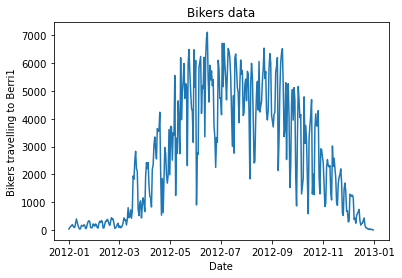

In [15]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt
plt.plot(df2['Date'],df2['Berri1'])
plt.xlabel('Date')
plt.ylabel('Bikers travelling to Berri1')

plt.title("Bikers data")
plt.show()


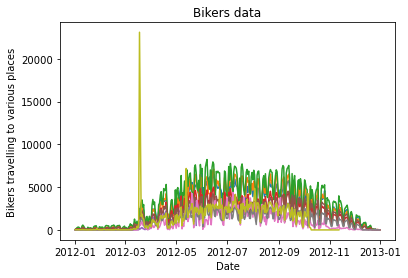

In [16]:
# plot all the columns of bikes_df
plt.plot(df2['Date'],df2.loc[0:,'Rachel / Papineau' : 'Pont_Jacques_Cartier'] , label = ['Rachel / Papineau', 'Berri1', 'Maisonneuve_2', 'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup', 'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'])

plt.xlabel('Date')
plt.ylabel('Bikers travelling to various places')
plt.title("Bikers data")
#plt.legend()

plt.show()

## Value counts

Get count of unique values in a particular column/Series.

In [17]:
# what are the unique genre in imdb_df?
genre_arr = pd.unique(df1['genre'])
genre_arr

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64


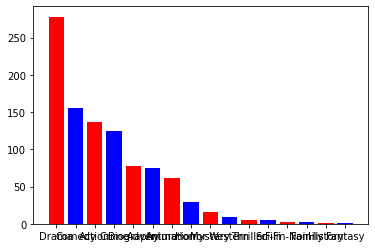

In [18]:
# plotting value counts of unique genres as a bar chart
import numpy as np
genre_count = df1['genre'].value_counts()
print(genre_count)

df_temp = pd.DataFrame(genre_count)
n = len(df_temp.index)
left = np.arange(1,1*n+1,1)
height = list(df_temp['genre'])
tick_label = df_temp.index.values
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'blue'])
plt.show()

In [19]:
# plotting value counts of unique genres as a pie chart

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [20]:
# show index of bikes_df
df2.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [21]:
# get row for date 2012-01-01
a = (df2['Date'] == '2012-01-01')
df2[a]

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [22]:
# show 11th row of imdb_df using iloc
df1.iloc[10]

star_rating                                                     8.8
title             The Lord of the Rings: The Fellowship of the Ring
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [23]:
# select only those movies where genre is adventure
a = (df1['genre'] == 'Adventure')
df1.loc[a]


,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [24]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
filt1 = (df1['star_rating'] > 8) & (df1['duration'] > 130)
ans = df1.loc[filt1,'genre'].value_counts()
temp_df = pd.DataFrame(ans)
temp_df.index[0]


'Drama'

## Adding a new column to DataFrame

In [25]:
# add a weekday column to bikes_df
df2['Weekday'] = df2['Date'].dt.day_name()
df2

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,Weekday
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,Sunday
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,00:00,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Deleting an existing column from DataFrame

In [26]:
# remove column 'Unnamed: 1' from bikes_df
df2.drop( columns = ['Unnamed: 1'],inplace = True)
df2

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,Weekday
0,2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
1,2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Deleting a row in DataFrame

In [27]:
# remove row no. 1 from bikes_df
df2.drop([0])

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,Weekday
1,2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
5,2012-01-06,75,146,244,98,4.0,86,4,0,17.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [28]:
# group imdb_df by movie genres
genre_grp = df1.groupby(['genre'])
genre_grp

In [29]:
# get crime movies group
genre_grp.get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...,...
927,7.5,Brick,R,Crime,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [30]:
# get mean of movie durations for each group
duration_mean = genre_grp['duration'].mean()
duration_mean

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [31]:
# change duration of all movies in a particular genre to mean duration of the group
n = len(df1.index)
for i in range(n):
    df1.loc[i,'duration'] = duration_mean[df1.loc[i,'genre']]

df1

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,107.602564,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,134.840000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,102.517241,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [32]:
# drop groups/genres that do not have average movie duration greater than 120.
n = len(df1.index)
for i in range(n):
    if (df1.loc[i,'duration'] <= 120) : 
        df1.drop(i,inplace = True)

df1

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
972,7.4,Blue Valentine,NC-17,Drama,126.539568,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126.539568,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
975,7.4,Back to the Future Part III,PG,Adventure,134.840000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [53]:
# group weekday wise bikers count
weekday_grp = df2.groupby(['Weekday'])



In [52]:
# get weekday wise biker count
day_lst = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sum_lst = []
for i in range(7):
    sum_lst.append(sum(list(dict(weekday_grp.get_group(day_lst[i]).sum()).values())[:-1]))
    
sum_lst

[849740.0, 820379.0, 926011.0, 960479.0, 860082.0, 604518.0, 633298.0]

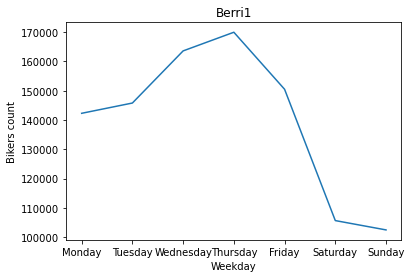

In [54]:
# plot weekday wise biker count for 'Berri1'
Berri1_sum = []
for i in range(7):
   Berri1_sum.append(weekday_grp.get_group(day_lst[i]).sum().loc['Berri1'])

plt.xlabel('Weekday')
plt.ylabel('Bikers count')
plt.plot(day_lst,Berri1_sum)
plt.title('Berri1')
plt.show()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)